# Shor's factoring algorithm

## Euclid's Algorithm

Write a function that implements Euclid's algorithm for calculating the greatest common divisor of two numbers a and b. 

In [7]:
import numpy as np

def gcd(a, b):
    r = 1
    while r != 0:
        r = a%b
        if r == 0:
            break
        a = b
        b = r
    
    return b

print(gcd(630, 56))

14


## period finding

write a function that takes $a$ and $N$ and returns the smallest $r$ such that $a^r = 1$ mod $N$

First, plot $a^r$ mod $N$ for different values of $r$. 

In [22]:
N = 13
a = 7

r_vals = np.arange(2, N)
a_power_r = np.power(a, r_vals)
print(a_power_r)
a_r_mod_N = a_power_r%N

[         49         343        2401       16807      117649      823543
     5764801    40353607   282475249  1977326743 13841287201]


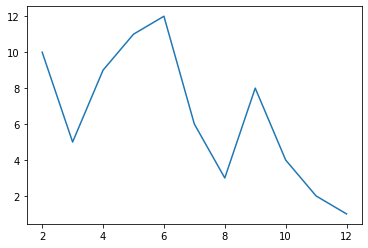

In [23]:
import matplotlib.pyplot as plt

plt.plot(r_vals, a_r_mod_N)

In [21]:
def modulo(a, r, N):
    
    mod = a
    for i in range(r - 1):
        mod = (mod*a)%N
        
    return mod 

print(modulo(7, 4, 15))

1


## Period detection

Write a function that returns the smallest r such that $a^r = 1$ mod $N$. 

In [37]:
def period(a, N):
    
    mod = a
    for i in range(2, N):
        mod = (mod*a)%N
        if mod == 1:
            return i

print(period(7, 15))

4


In [36]:
print(period(11, 31))

30


## Modular multiplication circuit 
Implement the circuit that calculates the modular multiplications of the form $|x\rangle \rightarrow |ax \textrm{mod} 15\rangle$ where $a = 7$. 

link: https://quantum-computing.ibm.com/composer/docs/iqx/guide/shors-algorithm

In [20]:
from qiskit import *

n = 4
circ = QuantumCircuit(n, n)

def swap(circuit, i, j):
    circuit.cx(i, j)
    circuit.cx(j, i)
    circuit.cx(i, j)
    return circuit 

def unitary_7(circuit):
    for i in range(n):
        circuit.x(i)
    
    circuit = swap(circuit, 1, 2)
    circuit = swap(circuit, 2, 3)
    circuit = swap(circuit, 0, 3)
    circuit.barrier()
    
    return circuit


# circ.x(0)
# circ.x(1)
# circ.barrier()

r = 4
for j in range(r):
    circ = unitary_7(circ)

circ.draw()

┌───┐                                   ┌───┐      ░ ┌───┐               »
q_0: ┤ X ├────────────────────────────────■──┤ X ├──■───░─┤ X ├───────────────»
     ├───┤     ┌───┐                      │  └─┬─┘  │   ░ ├───┤     ┌───┐     »
q_1: ┤ X ├──■──┤ X ├──■───────────────────┼────┼────┼───░─┤ X ├──■──┤ X ├──■──»
     ├───┤┌─┴─┐└─┬─┘┌─┴─┐     ┌───┐       │    │    │   ░ ├───┤┌─┴─┐└─┬─┘┌─┴─┐»
q_2: ┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├──■────┼────┼────┼───░─┤ X ├┤ X ├──■──┤ X ├»
     ├───┤└───┘     └───┘┌─┴─┐└─┬─┘┌─┴─┐┌─┴─┐  │  ┌─┴─┐ ░ ├───┤└───┘     └───┘»
q_3: ┤ X ├───────────────┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─░─┤ X ├───────────────»
     └───┘               └───┘     └───┘└───┘     └───┘ ░ └───┘               »
c: 4/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                         ┌───┐      ░ ┌───┐                                   »
«q_0: ─────────────────■──┤ X ├──■───░─┤ X ├────────────────────────────────■──»
«                      │  └─┬─┘  │   ░ ├───┤     ┌───┐                      │  »
«q_1: ─────────────────┼────┼────┼───░─┤ X ├──■──┤ X ├──■───────────────────┼──»
«          ┌───┐       │    │    │   ░ ├───┤┌─┴─┐└─┬─┘┌─┴─┐     ┌───┐       │  »
«q_2: ──■──┤ X ├──■────┼────┼────┼───░─┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├──■────┼──»
«     ┌─┴─┐└─┬─┘┌─┴─┐┌─┴─┐  │  ┌─┴─┐ ░ ├───┤└───┘     └───┘┌─┴─┐└─┬─┘┌─┴─┐┌─┴─┐»
«q_3: ┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─░─┤ X ├───────────────┤ X ├──■──┤ X ├┤ X ├»
«     └───┘     └───┘└───┘     └───┘ ░ └───┘               └───┘     └───┘└───┘»
«c: 4/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«     ┌───┐      ░ ┌───┐                                   ┌───┐      ░ 
«q_0: ┤ X ├──■───░─┤ X ├────────────────────────────────■──┤ X ├──■───░─
«     └─┬─┘  │   ░ ├───┤     ┌───┐                      │  └─┬─┘  │   ░ 
«q_1: ──┼────┼───░─┤ X ├──■──┤ X ├──■───────────────────┼────┼────┼───░─
«       │    │   ░ ├───┤┌─┴─┐└─┬─┘┌─┴─┐     ┌───┐       │    │    │   ░ 
«q_2: ──┼────┼───░─┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├──■────┼────┼────┼───░─
«       │  ┌─┴─┐ ░ ├───┤└───┘     └───┘┌─┴─┐└─┬─┘┌─┴─┐┌─┴─┐  │  ┌─┴─┐ ░ 
«q_3: ──■──┤ X ├─░─┤ X ├───────────────┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─░─
«          └───┘ ░ └───┘               └───┘     └───┘└───┘     └───┘ ░ 
«c: 4/══════════════════════════════════════════════════════════════════
«

In [21]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
results = job.result()
psi = results.get_statevector(circ)

for i in range(len(psi)):
    print(f"{bin(i)} :" + str(abs(psi[i]**2)))

0b0 :1.0
0b1 :0.0
0b10 :0.0
0b11 :0.0
0b100 :0.0
0b101 :0.0
0b110 :0.0
0b111 :0.0
0b1000 :0.0
0b1001 :0.0
0b1010 :0.0
0b1011 :0.0
0b1100 :0.0
0b1101 :0.0
0b1110 :0.0
0b1111 :0.0
